# STROKE PREDICTION

Stroke is a medical emergency. A stroke occurs when blood flow to a part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die within minutes.

Context:

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information:

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Data Collection

In [2]:
# Loading the dataset
data = pd.read_csv("healthcare-dataset-stroke-data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.shape

(5110, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# ID is an unique identifier so we can drop that column
data.drop(['id'],axis=1,inplace=True)

In [7]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# 2. Pre-processing

2.1 Missing value handling

In [8]:
# Checking for null values
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

BMI column contains null values

<AxesSubplot:xlabel='bmi', ylabel='Count'>

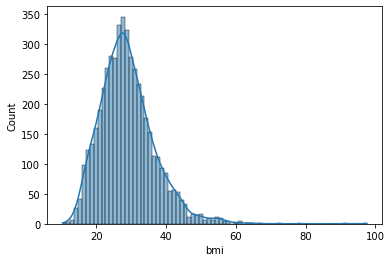

In [9]:
# Handling null values in bmi column
sns.histplot(data['bmi'],kde=True)

In [10]:
# We can fill the null values with median
data['bmi']=data['bmi'].fillna(data['bmi'].median())

In [11]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

2.2 Outlier detection and handling

<AxesSubplot:>

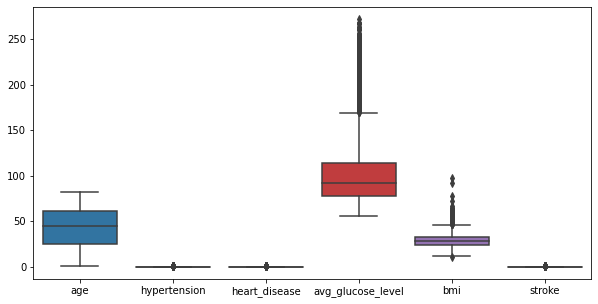

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data)

There are outliers both in avg glucose level and bmi

<AxesSubplot:xlabel='avg_glucose_level'>

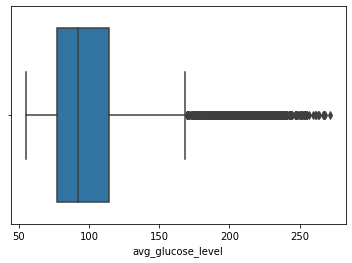

In [13]:
# Detecting and Handling outliers in avg_glucose_level
sns.boxplot(x='avg_glucose_level',data=data)

In [14]:
# Detecting and Handling outliers in avg_glucose_level
q1,q2,q3 = np.percentile(data['avg_glucose_level'],[25,50,75])
q1,q2,q3

(77.245, 91.88499999999999, 114.09)

In [15]:
# Finding the Inter Quartile Range
IQR = q3-q1
IQR

36.845

In [16]:
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)

lower =  21.977500000000006
upper =  169.35750000000002


In [17]:
outlier = []
for i in data['avg_glucose_level']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
outlier

[228.69,
 202.21,
 171.23,
 174.12,
 186.21,
 219.84,
 214.09,
 191.61,
 221.29,
 217.08,
 193.94,
 233.29,
 228.7,
 208.3,
 189.84,
 195.23,
 211.78,
 212.08,
 196.92,
 252.72,
 219.72,
 213.03,
 243.58,
 197.54,
 196.71,
 237.75,
 194.99,
 180.93,
 185.17,
 221.58,
 179.12,
 228.56,
 240.09,
 226.98,
 235.63,
 240.59,
 190.32,
 231.61,
 191.82,
 224.1,
 216.94,
 259.63,
 249.31,
 219.91,
 200.59,
 190.14,
 182.99,
 206.09,
 263.32,
 207.28,
 194.37,
 199.2,
 221.79,
 239.07,
 169.67,
 223.83,
 231.56,
 221.89,
 195.71,
 203.87,
 185.49,
 213.22,
 215.94,
 209.86,
 205.77,
 271.74,
 200.62,
 242.52,
 175.29,
 208.65,
 205.33,
 210.4,
 199.86,
 219.73,
 250.89,
 205.35,
 216.58,
 184.4,
 199.84,
 218.46,
 211.06,
 197.28,
 233.94,
 247.51,
 210.95,
 243.53,
 205.84,
 198.21,
 206.72,
 214.45,
 190.7,
 203.04,
 242.3,
 220.49,
 218.46,
 216.7,
 234.58,
 235.85,
 243.5,
 182.2,
 229.92,
 215.6,
 239.64,
 200.28,
 205.23,
 209.58,
 210.78,
 251.6,
 213.37,
 223.36,
 178.29,
 203.81,
 205.

<AxesSubplot:xlabel='bmi'>

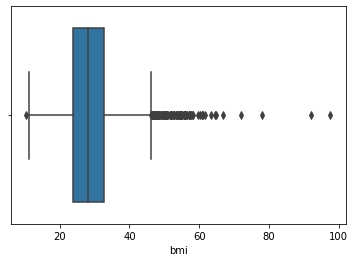

In [18]:
sns.boxplot(x='bmi',data=data)

In [19]:
# Detecting and Handling outliers in avg_glucose_level
q1,q2,q3 = np.percentile(data['bmi'],[25,50,75])
q1,q2,q3

(23.8, 28.1, 32.8)

In [20]:
# Finding the Inter Quartile Range
IQR = q3-q1
IQR

8.999999999999996

In [21]:
lower_limit = q1-(1.5*IQR)
upper_limit = q3+(1.5*IQR)
print("lower = " ,lower_limit)
print("upper = " ,upper_limit)

lower =  10.300000000000006
upper =  46.29999999999999


In [22]:
outlier = []
for i in data['bmi']:
    if ((i>upper_limit) or (i<lower_limit)):
        outlier.append(i)
outlier

[48.9,
 47.5,
 56.6,
 50.1,
 54.6,
 60.9,
 54.7,
 48.2,
 64.8,
 47.3,
 46.5,
 46.6,
 54.7,
 49.8,
 60.2,
 51.0,
 51.5,
 71.9,
 50.2,
 47.8,
 54.6,
 55.7,
 55.7,
 57.5,
 54.2,
 52.3,
 50.3,
 78.0,
 50.2,
 53.4,
 55.2,
 48.4,
 50.6,
 49.5,
 55.0,
 54.8,
 50.2,
 47.5,
 52.8,
 66.8,
 55.1,
 48.5,
 55.9,
 57.3,
 10.3,
 49.8,
 56.0,
 51.8,
 57.7,
 48.9,
 49.3,
 49.8,
 54.0,
 56.1,
 97.6,
 53.9,
 49.4,
 48.5,
 49.2,
 48.7,
 48.9,
 53.8,
 46.5,
 48.8,
 52.7,
 52.8,
 55.7,
 53.5,
 50.5,
 51.9,
 63.3,
 52.8,
 61.2,
 48.0,
 46.8,
 50.1,
 48.3,
 58.1,
 49.3,
 50.4,
 52.7,
 48.3,
 49.3,
 51.9,
 53.4,
 50.3,
 59.7,
 47.4,
 52.5,
 52.9,
 54.7,
 61.6,
 49.9,
 53.8,
 47.3,
 54.3,
 47.9,
 55.0,
 50.9,
 50.6,
 57.2,
 64.4,
 92.0,
 50.8,
 55.9,
 57.9,
 47.6,
 55.7,
 48.8,
 57.2,
 47.5,
 46.4,
 46.9,
 50.2,
 47.1,
 48.1,
 51.7,
 60.9,
 47.8,
 47.6,
 46.3,
 54.1,
 56.6,
 49.5,
 47.6,
 46.9]

In [23]:
# As it looks like we are having genuine cases, we could not drop the outliers in this case;
# hence, we are performing Log Transformation.
for col in ['avg_glucose_level','bmi']:
    data[col]=np.log(data[col])

In [24]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,4.592465,3.328712,0.048728
std,22.612647,0.296607,0.226063,0.361985,0.259801,0.215320
min,0.080000,0.000000,0.000000,4.009513,2.332144,0.000000
25%,25.000000,0.000000,0.000000,4.346982,3.169686,0.000000
50%,45.000000,0.000000,0.000000,4.520538,3.335770,0.000000
75%,61.000000,0.000000,0.000000,4.736988,3.490429,0.000000
max,82.000000,1.000000,1.000000,5.604846,4.580877,1.000000


# 3. Exploratory Data Analysis (EDA)

3.1 Univariate analysis

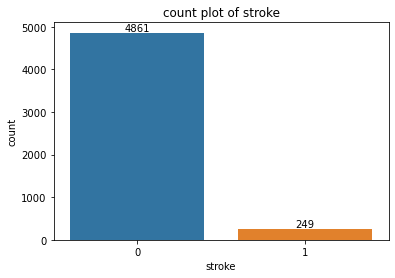

In [25]:
# Stroke(target column)
df=sns.countplot(data=data,x='stroke')
plt.title("count plot of stroke")
for i in df.containers:
    df.bar_label(i)

Stroke is our target column, and the possibility of affecting Stroke out of 5110 patients is 249.

In [26]:
# Analysing numerical columns
cols=data[['age','bmi','avg_glucose_level']]

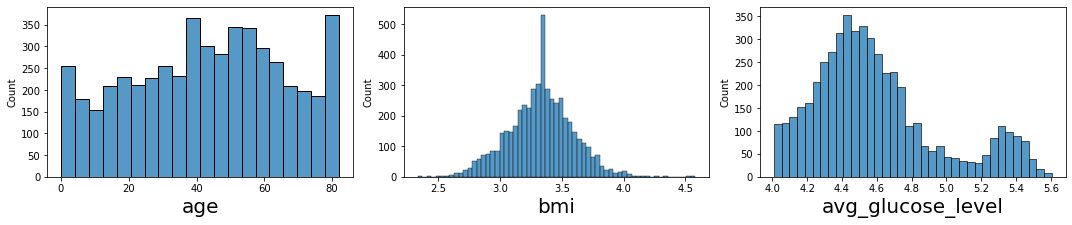

In [27]:
plt.figure(figsize=(15,15))
plotnumber =1
for column in cols:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.histplot(cols[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

As we have already performed Log Transformation for the 'bmi' and 'avg glucose level', we can see that it's normally distributed along with 'age'.

In [28]:
cat = data[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']]

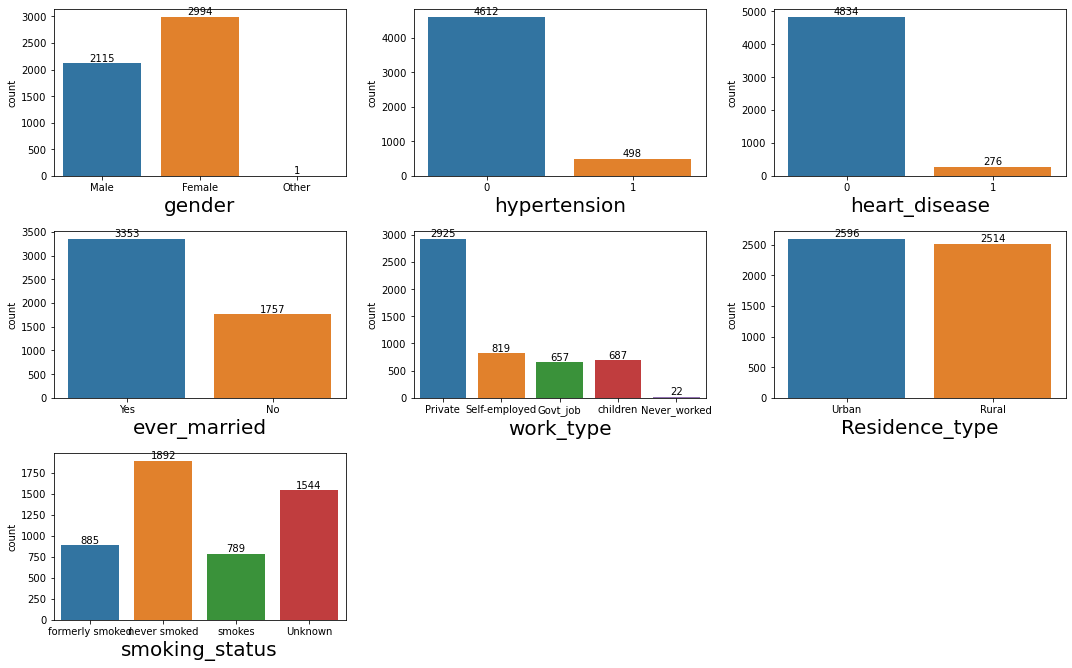

In [29]:
plt.figure(figsize=(15,15))
plotnumber =1
for column in cat:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        df=sns.countplot(cat[column])
        plt.xlabel(column,fontsize=20)
        for i in df.containers:
             df.bar_label(i)
    plotnumber+=1
        
plt.tight_layout()

1. There are more female patients than male

2. There are more number of patients having hypertention and heart diseases

3. There are more married persons

4. There are more patients whom belongs to private jobs

5. There is no significant difference in numbers of resident_type

3.2 Bivariate analysis

Text(0.5, 1.0, 'Stroke vs Gender')

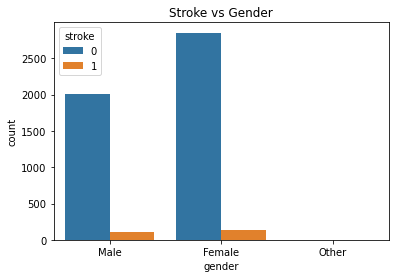

In [30]:
# Gender with stroke
sns.countplot(data=data,x='gender',hue='stroke')
plt.title("Stroke vs Gender")

There is no much significant difference between stroke rate based on gender.

Text(0.5, 1.0, 'Stroke vs Age')

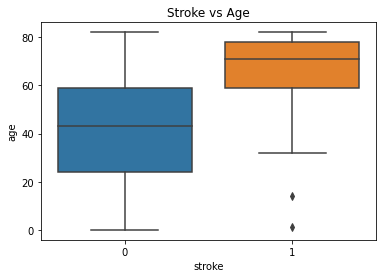

In [31]:
# Age with stroke
sns.boxplot(data=data,x='stroke',y='age')
plt.title("Stroke vs Age")

People aged more than 60 years tend to have stroke than others. Also, some people below the age 20 tends to have stroke.

Text(0.5, 1.0, 'Stroke vs Ever married')

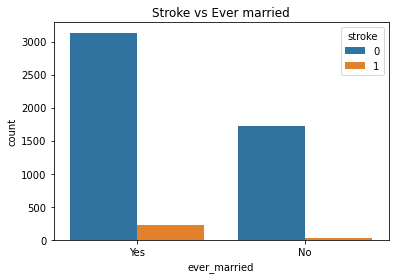

In [32]:
sns.countplot(data=data,x='ever_married',hue='stroke')
plt.title("Stroke vs Ever married")

There is a significant different in the attributes

Text(0.5, 1.0, 'Stroke vs Work type')

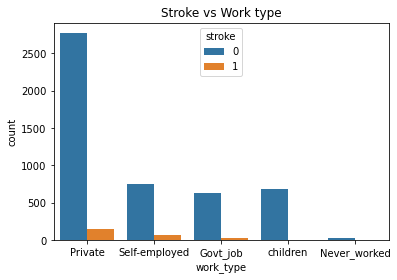

In [33]:
sns.countplot(data=data,x='work_type',hue='stroke')
plt.title("Stroke vs Work type")

People working in the private sector prone to have a tendencey of getting stroke than those who have never worked.

Text(0.5, 1.0, 'stroke vs Residence_type')

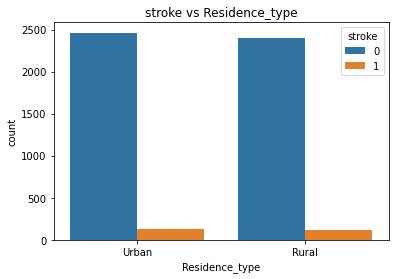

In [34]:
sns.countplot(data=data,x='Residence_type',hue='stroke')
plt.title("stroke vs Residence_type")

There is no much difference in both attribute values, and can be discarded

Text(0.5, 1.0, 'stroke vs avg_glucose_level')

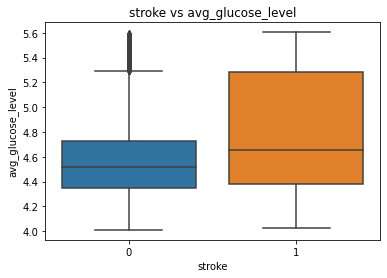

In [35]:
sns.boxplot(data=data,x='stroke',y='avg_glucose_level')
plt.title("stroke vs avg_glucose_level")

People having stroke has an average glucose level of  more 100, also we could see some outliers that may be genuine


Text(0.5, 1.0, 'Stroke vs Smoking status')

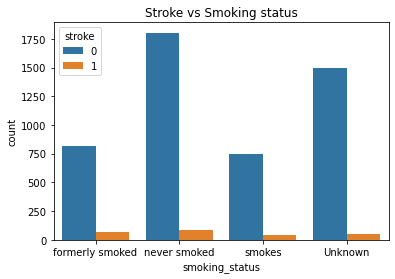

In [36]:
sns.countplot(data=data,x='smoking_status',hue='stroke')
plt.title("Stroke vs Smoking status")

There is no much significant difference here

2.3 Encoding

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Encoding object columns:

In [38]:
data['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [39]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['smoking_status'] =label_encoder.fit_transform(data['smoking_status'])

In [40]:
data['work_type'] = label_encoder.fit_transform(data['work_type'])

In [41]:
data = pd.get_dummies(data,columns=['gender','ever_married','Residence_type'],drop_first=True)
data.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban
0,67.0,0,1,2,5.432367,3.600048,1,1,1,0,1,1
1,61.0,0,0,3,5.309307,3.335770,2,1,0,0,1,0
2,80.0,0,1,2,4.662684,3.481240,2,1,1,0,1,0
3,49.0,0,0,2,5.143008,3.538057,3,1,0,0,1,1
4,79.0,1,0,3,5.159745,3.178054,2,1,0,0,1,0


All object columns are encoded.

In [42]:
data.shape

(5110, 12)

In [43]:
data.describe()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,2.167710,4.592465,3.328712,1.376908,0.048728,0.413894,0.000196,0.656164,0.508023
std,22.612647,0.296607,0.226063,1.090293,0.361985,0.259801,1.071534,0.215320,0.492578,0.013989,0.475034,0.499985
min,0.080000,0.000000,0.000000,0.000000,4.009513,2.332144,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,2.000000,4.346982,3.169686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,2.000000,4.520538,3.335770,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,61.000000,0.000000,0.000000,3.000000,4.736988,3.490429,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,82.000000,1.000000,1.000000,4.000000,5.604846,4.580877,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


2.4 Feature reduction

&

2.6 Feature Engineering

<AxesSubplot:>

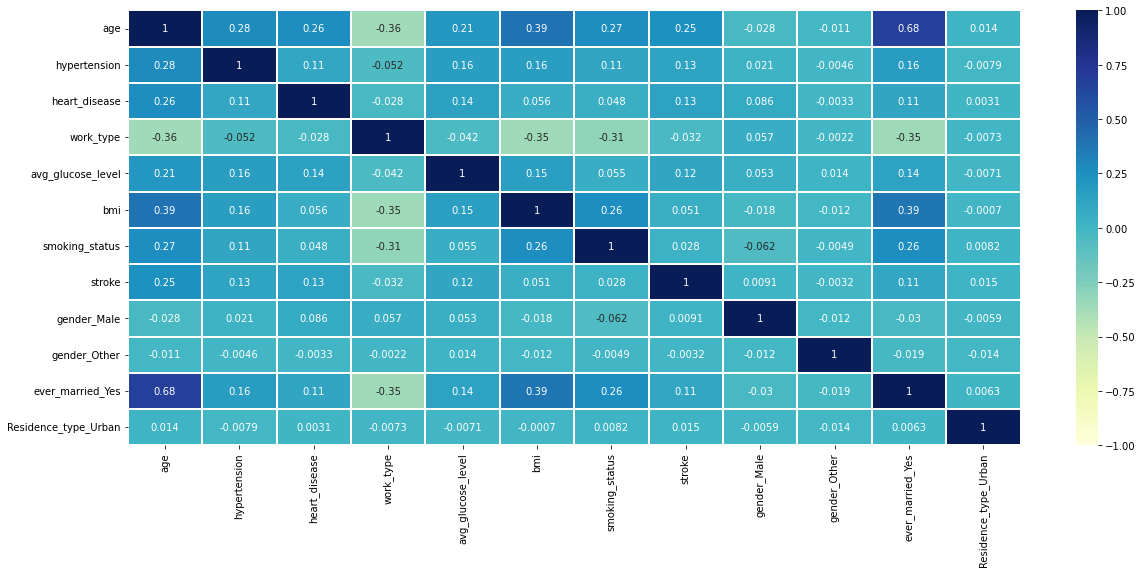

In [44]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

As part of feature reduction we have already droped the id column, and as per the above heat map there is no high/low correlation among the variables.

2.5 Standardization/Normalization

In [45]:
# Splitting data
x=data.drop('stroke',axis=1)
y=data['stroke']

In [46]:
# Min Max scalar
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.526692,0.097456,0.054012,0.541928,0.365411,0.443168,0.458969,0.413894,0.000196,0.656164,0.508023
std,0.276033,0.296607,0.226063,0.272573,0.226902,0.115532,0.357178,0.492578,0.013989,0.475034,0.499985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.304199,0.000000,0.000000,0.500000,0.211535,0.372450,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.548340,0.000000,0.000000,0.500000,0.320325,0.446307,0.666667,0.000000,0.000000,1.000000,1.000000
75%,0.743652,0.000000,0.000000,0.750000,0.456002,0.515083,0.666667,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
data.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other,ever_married_Yes,Residence_type_Urban
0,67.0,0,1,2,5.432367,3.600048,1,1,1,0,1,1
1,61.0,0,0,3,5.309307,3.335770,2,1,0,0,1,0
2,80.0,0,1,2,4.662684,3.481240,2,1,1,0,1,0
3,49.0,0,0,2,5.143008,3.538057,3,1,0,0,1,1
4,79.0,1,0,3,5.159745,3.178054,2,1,0,0,1,0


In [48]:
# Splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)

In [49]:
x_train.shape

(3423, 11)

In [50]:
y_train.shape

(3423,)

In [51]:
x_test.shape

(1687, 11)

In [52]:
y_test.shape

(1687,)

# 4. Modelling

In [53]:
# Model training
# Randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [54]:
# Evaluate the performance
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score

In [55]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  0.943094250148192
Recall Score is :  0.943094250148192
Precision Score is :  0.943094250148192
F1 score is :  0.943094250148192


In [56]:
confusion_matrix(y_test,y_pred)

array([[1590,    1],
       [  95,    1]], dtype=int64)

In [57]:
# Checking feature importance
pd.Series(rf.feature_importances_,index= x.columns).sort_values(ascending=False)*100

4     27.962463
0     23.368092
5     23.090481
6      6.946709
3      5.479457
7      3.158804
10     3.148157
2      2.469429
1      2.357291
9      2.019117
8      0.000000
dtype: float64

In [58]:
# Droping gender_Other column
data =data.drop(['gender_Other'],axis=1)
data.head()

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,ever_married_Yes,Residence_type_Urban
0,67.0,0,1,2,5.432367,3.600048,1,1,1,1,1
1,61.0,0,0,3,5.309307,3.335770,2,1,0,1,0
2,80.0,0,1,2,4.662684,3.481240,2,1,1,1,0
3,49.0,0,0,2,5.143008,3.538057,3,1,0,1,1
4,79.0,1,0,3,5.159745,3.178054,2,1,0,1,0


In [59]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression
logit_model= LogisticRegression(random_state =42)
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

In [60]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  0.943094250148192
Recall Score is :  0.943094250148192
Precision Score is :  0.943094250148192
F1 score is :  0.943094250148192


In [61]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

In [62]:
# To obtain optimum k values 
acc_values = []
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    acc_values.append(acc)
    acc_values

Text(0, 0.5, 'accuracy')

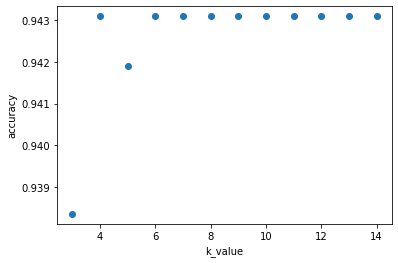

In [63]:
plt.plot(neighbors,acc_values,'o')
plt.xlabel('k_value')
plt.ylabel('accuracy')

In [64]:
classifier =KNeighborsClassifier(n_neighbors = 6)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [65]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  0.943094250148192
Recall Score is :  0.943094250148192
Precision Score is :  0.943094250148192
F1 score is :  0.943094250148192


In [66]:
confusion_matrix(y_test,y_pred)

array([[1591,    0],
       [  96,    0]], dtype=int64)

In [67]:
# SVM model
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state = 0)
classifier.fit(x_train,y_train)
y_pred_svc = classifier.predict(x_test)

In [68]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  0.943094250148192
Recall Score is :  0.943094250148192
Precision Score is :  0.943094250148192
F1 score is :  0.943094250148192


Al the models are having 94.30 of accuracy, and here we will go with SVM model

# 5. Model Fine tuning

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.955 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.955 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.921 total time=   0.1s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.934 total time=   0.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.921 total time=   0.1s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.927 total time=   0.1s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.955 total time=   0.6s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.8s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.7s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.946 total time=   0.6s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.952 total time=   0.9s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.955 total time=   1.5s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.955 total time=   1.7s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.955 total time=   1.4s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [71]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [72]:
from sklearn.svm import SVC
classifier = SVC(C= 100, gamma= 0.1, kernel='rbf')
classifier.fit(x_train,y_train)
y_pred_svc = classifier.predict(x_test)

In [73]:
print('Accuracy Score is : ',accuracy_score(y_test,y_pred))
print('Recall Score is : ', recall_score(y_test,y_pred, average='micro'))
print('Precision Score is : ', precision_score(y_test,y_pred, average='micro'))
print('F1 score is : ', f1_score(y_test,y_pred, average='micro'))

Accuracy Score is :  0.943094250148192
Recall Score is :  0.943094250148192
Precision Score is :  0.943094250148192
F1 score is :  0.943094250148192


In [74]:
confusion_matrix(y_test,y_pred)

array([[1591,    0],
       [  96,    0]], dtype=int64)

Successfully trained the data and a prediction model has been created with the help of Support Vector Machine(SVM) algorithm with 94.30 accuracy.

                                                    -- The End --